# Using bandits to learn probabilities for the search space

To learn probabilities for the search space, the `Brush` estimators (not the DEAP!) uses a multi-armed bandit approach. 

This allows it to dynamically adjust the sampling probabilities of different operations based on their performance.

Not only it can learn how to sample terminals, but it also learns which mutations are useful and which are not. This is also important, as the mutations are responsible for sampling from the search space.

In this notebook, we show how to set this configuration, and how it changes the probabilities.

In [1]:
import pandas as pd
from pybrush import Dataset, SearchSpace
from pybrush import BrushRegressor

df = pd.read_csv('../examples/datasets/d_enc.csv')
X = df.drop(columns='label')
y = df['label']

data = Dataset(X,y)

search_space = SearchSpace(data)

This is the original search space using the loaded dataset. 

In [2]:
print( search_space.print() )

=== Search space ===
terminal_map: {"ArrayB": ["1.00"], "ArrayI": ["x_5", "x_7", "1.00"], "ArrayF": ["x_0", "x_1", "x_2", "x_3", "x_4", "x_6", "1.00", "1.00"]}
terminal_weights: {"ArrayB": [1], "ArrayI": [0.011619061, 0.03579926, 0.023709161], "ArrayF": [0.6343385, 0.67299956, 0.42711574, 0.8625447, 0.8957853, 0.20750472, 0.6167148, 0.6167148]}
node_map[ArrayI][["ArrayF", "ArrayI", "ArrayI"]][SplitOn] = 1.00*SplitOn, weight = 1
node_map[ArrayI][["ArrayI", "ArrayI", "ArrayI"]][SplitOn] = 1.00*SplitOn, weight = 1
node_map[ArrayI][["ArrayI", "ArrayI"]][SplitBest] = 1.00*SplitBest, weight = 1
node_map[MatrixF][["ArrayF", "ArrayF", "ArrayF", "ArrayF"]][Logistic] = 1.00*Logistic, weight = 1
node_map[MatrixF][["ArrayF", "ArrayF", "ArrayF", "ArrayF"]][Square] = 1.00*Square, weight = 1
node_map[MatrixF][["ArrayF", "ArrayF", "ArrayF", "ArrayF"]][Sqrtabs] = 1.00*Sqrtabs, weight = 1
node_map[MatrixF][["ArrayF", "ArrayF", "ArrayF", "ArrayF"]][Sqrt] = 1.00*Sqrt, weight = 1
node_map[MatrixF][["ArrayF

There are two important settings for this:

- `bandit`, which specifies which strategy will be used to learn the probabilities, and
- `weights_init`, which will initialize the sampling probabilities for terminals in the search space based on the correlation between each terminal and the target variable.

In [3]:
est = BrushRegressor(
    functions=['SplitOn','Add','Exp','Sub', 'SplitBest',
               'Mul','Sin','Cos','Exp','Logabs'],
    max_gens=1000,
    pop_size=100,
    objectives=["error", "linear_complexity"],
    
    # Changing search space sampling probabilities
    bandit='linear_thompson',
    weights_init=False,
    use_arch=False,
    
    verbosity=2
)

In [4]:
X_trim = X #.iloc[:,[1]]

est.fit(X_trim,y)

Generation 1/1000 [/                                                 ]
Train Loss (Med): 14.64283 (74.37033)
Val Loss (Med): 90.38513 (74.37033)
Median Size (Max): 3 (14)
Median complexity (Max): 20 (8264)
Time (s): 0.10304

Generation 2/1000 [/                                                 ]
Train Loss (Med): 14.24093 (60.79966)
Val Loss (Med): 14.64283 (60.79966)
Median Size (Max): 3 (18)
Median complexity (Max): 20 (8136)
Time (s): 0.21751

Generation 3/1000 [/                                                 ]
Train Loss (Med): 14.12979 (60.79966)
Val Loss (Med): 14.24093 (60.79966)
Median Size (Max): 3 (18)
Median complexity (Max): 20 (8136)
Time (s): 0.31540

Generation 4/1000 [/                                                 ]
Train Loss (Med): 11.41779 (17.94969)
Val Loss (Med): 14.12979 (17.94969)
Median Size (Max): 3 (18)
Median complexity (Max): 20 (8136)
Time (s): 0.43206

Generation 5/1000 [/                                                 ]
Train Loss (Med): 11.41779 (1

BrushRegressor(algorithm='nsga2', bandit='linear_thompson', batch_size=1.0,
               cx_prob=0.14285714285714285,
               functions=['SplitOn', 'Add', 'Exp', 'Sub', 'SplitBest', 'Mul',
                          'Sin', 'Cos', 'Exp', 'Logabs'],
               initialization='uniform', load_population='', logfile='',
               max_depth=3, max_gens=1000, max_size=20, max_stall=0,
               max_time=-1, mig_prob=0.05, mode='regressor',
               mutation_probs={...
                               'subtree': 0.16666666666666666,
                               'toggle_weight_off': 0.16666666666666666,
                               'toggle_weight_on': 0.16666666666666666},
               n_jobs=1, num_islands=5,
               objectives=['error', 'linear_complexity'], pop_size=100,
               random_state=None, save_population='', scorer='mse',
               sel='lexicase', shuffle_split=True, surv='nsga2', use_arch=False,
               val_from_arch=True, validation_size=0.0, verbosity=2, ...)

In [5]:
from sklearn.metrics import root_mean_squared_error

y_pred = est.predict(X_trim)
print('R2 score:', est.score(X_trim,y))
print('RMSE    :', root_mean_squared_error(y, y_pred))

R2 score: 0.8887999653084887
RMSE    : 3.170304517959994


model: If(x0>0.75,Add(0.05*x1,18.84*x6),Add(0.02*x1,10.47*x6))


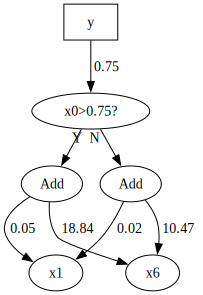

In [6]:
import graphviz

print('model:', est.best_estimator_.get_model())

model = est.best_estimator_.get_model("dot")
graphviz.Source(model)

The attribute `search_space_` is an original copy and it is not changed.

In [7]:
est.search_space_.print()

=== Search space ===
terminal_map: {"ArrayB": ["1.00"], "ArrayI": ["x5", "x7", "1.00"], "ArrayF": ["x0", "x1", "x2", "x3", "x4", "x6", "1.00", "1.00"]}
terminal_weights: {"ArrayB": [1], "ArrayI": [1, 1, 1], "ArrayF": [1, 1, 1, 1, 1, 1, 1, 1]}
node_map[ArrayI][["ArrayF", "ArrayI", "ArrayI"]][SplitOn] = 1.00*SplitOn, weight = 1
node_map[ArrayI][["ArrayI", "ArrayI", "ArrayI"]][SplitOn] = 1.00*SplitOn, weight = 1
node_map[ArrayI][["ArrayI", "ArrayI"]][SplitBest] = 1.00*SplitBest, weight = 1
node_map[MatrixF][["ArrayF", "ArrayF", "ArrayF", "ArrayF"]][Logabs] = 1.00*Logabs, weight = 1
node_map[MatrixF][["ArrayF", "ArrayF", "ArrayF", "ArrayF"]][Exp] = 1.00*Exp, weight = 1
node_map[MatrixF][["ArrayF", "ArrayF", "ArrayF", "ArrayF"]][Sin] = 1.00*Sin, weight = 1
node_map[MatrixF][["ArrayF", "ArrayF", "ArrayF", "ArrayF"]][Cos] = 1.00*Cos, weight = 1
node_map[MatrixF][["ArrayF", "ArrayF", "ArrayF"]][Logabs] = 1.00*Logabs, weight = 1
node_map[MatrixF][["ArrayF", "ArrayF", "ArrayF"]][Exp] = 1.00*Exp,

When we call `fit`, the Brush engine is set to run and return the best individual. Then, the engine is stored as an attribute in our estimator, called `engine_`, and we can retrieve the learned probabilities by looking at the engine's search space.

In [8]:
est.engine_.search_space.print()

=== Search space ===
terminal_map: {"ArrayB": ["1.00"], "ArrayI": ["x5", "x7", "1.00"], "ArrayF": ["x0", "x1", "x2", "x3", "x4", "x6", "1.00", "1.00"]}
terminal_weights: {"ArrayB": [1], "ArrayI": [1, 0.0010178406, 0.28799203], "ArrayF": [4.8073703e-06, 7.274217e-07, 0.0005925358, 6.486696e-05, 1, 1.2500631e-06, 0.008476753, 0.00039202432]}
node_map[ArrayI][["ArrayF", "ArrayI", "ArrayI"]][SplitOn] = 1.00*SplitOn, weight = 1
node_map[ArrayI][["ArrayI", "ArrayI", "ArrayI"]][SplitOn] = 1.00*SplitOn, weight = 1
node_map[ArrayI][["ArrayI", "ArrayI"]][SplitBest] = 1.00*SplitBest, weight = 1
node_map[MatrixF][["ArrayF", "ArrayF", "ArrayF", "ArrayF"]][Logabs] = 1.00*Logabs, weight = 0.16407393
node_map[MatrixF][["ArrayF", "ArrayF", "ArrayF", "ArrayF"]][Exp] = 1.00*Exp, weight = 0.008058937
node_map[MatrixF][["ArrayF", "ArrayF", "ArrayF", "ArrayF"]][Sin] = 1.00*Sin, weight = 0.88932514
node_map[MatrixF][["ArrayF", "ArrayF", "ArrayF", "ArrayF"]][Cos] = 1.00*Cos, weight = 1
node_map[MatrixF][["Arr

Mutation probabilities are stored in the parameters, not the search space. The same way that we can have the original and the learned probabilities by looking at the instance references and the instance's engine reference, we can look the learned probabilities.

In [9]:
print(est.parameters_.cx_prob)
print(est.parameters_.mutation_probs)

0.1428571492433548
{'delete': 0.1666666716337204, 'insert': 0.1666666716337204, 'point': 0.1666666716337204, 'subtree': 0.1666666716337204, 'toggle_weight_off': 0.1666666716337204, 'toggle_weight_on': 0.1666666716337204}


In [10]:
print(est.engine_.params.cx_prob)
print(est.engine_.params.mutation_probs)

0.003701126668602228
{'delete': 0.08519456535577774, 'insert': 1.0, 'point': 0.0016215168870985508, 'subtree': 0.015428934246301651, 'toggle_weight_off': 0.000259377877227962, 'toggle_weight_on': 0.009287972934544086}
